In [1]:
#imports
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

In [2]:
Cleaned_data = pd.read_csv("CleanData.csv")
walc = Cleaned_data['Walc']
dalc = Cleaned_data['Dalc']

In [3]:
#import survey data
Survey_data = pd.read_csv('SurveyData.csv')

In [18]:
#concatenate two sets of data
num_data = ['age', 'school_num', 'sex_num', 'address_num', 'famsize_num', 'reason_num', 'traveltime', 
            'studytime', 'failures', 'famsup_num', 'internet_num', 'romantic_num', 'freetime', 'Dalc', 
            'Walc', 'health', 'paid_num']

Survey_data_num = Survey_data[num_data]
Cleaned_data_num = Cleaned_data[num_data]

num_data_df = pd.concat([Survey_data_num, Cleaned_data_num])
walc_all = num_data_df['Walc']
dalc_all = num_data_df['Dalc']
school_all = num_data_df['school_num']

In [19]:
num_data_df.describe()

,age,school_num,sex_num,address_num,famsize_num,reason_num,traveltime,studytime,failures,famsup_num,internet_num,romantic_num,freetime,Dalc,Walc,health,paid_num
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,17.353247,0.432468,0.441558,0.283117,0.674026,1.425974,1.587013,2.023377,0.363636,0.416883,0.218182,0.612987,3.136364,1.505195,2.292208,3.596104,0.932468
std,2.812270,0.608766,0.496896,0.450806,0.469042,0.983796,0.760424,0.906256,0.770204,0.493364,0.413280,0.487383,1.085836,0.914042,1.293805,1.402853,0.251105
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,3.000000,1.000000
50%,17.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2.000000,4.000000,1.000000
75%,18.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,4.000000,2.000000,3.000000,5.000000,1.000000
max,47.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [20]:
num_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 721
Data columns (total 17 columns):
age             770 non-null float64
school_num      770 non-null int64
sex_num         770 non-null int64
address_num     770 non-null int64
famsize_num     770 non-null int64
reason_num      770 non-null int64
traveltime      770 non-null float64
studytime       770 non-null float64
failures        770 non-null float64
famsup_num      770 non-null int64
internet_num    770 non-null int64
romantic_num    770 non-null int64
freetime        770 non-null float64
Dalc            770 non-null float64
Walc            770 non-null float64
health          770 non-null float64
paid_num        770 non-null int64
dtypes: float64(8), int64(9)
memory usage: 108.3 KB


In [21]:
from sklearn.decomposition import PCA 

In [22]:
# Only use columns with numbers involved:
chosen_columns = ['Fedu', 'G1', 'G2', 'G3', 'Medu','absences', 'age', 
                  'failures', 'famrel', 'freetime', 'goout', 'health', 'math', 
                  'port', 'studytime', 'traveltime', 'school_num', 'sex_num','address_num', 
                  'famsize_num', 'Pstatus_num', 'Mjob_num', 'Fjob_num','reason_num', 
                  'guardian_num', 'schoolsup_num', 'famsup_num', 'activities_num','nursery_num', 
                  'higher_num', 'internet_num', 'romantic_num', 'paid_num']

Cleaned_data_subset = Cleaned_data[chosen_columns]

In [23]:
#building PCA models
pca_model = PCA()
X_PCA = pca_model.fit_transform(Cleaned_data_subset)

In [24]:
pca_model.explained_variance_ratio_

array([  5.68058622e-01,   2.15161860e-01,   3.34022863e-02,
         2.42039153e-02,   2.05323923e-02,   1.77053936e-02,
         1.37024493e-02,   1.21234904e-02,   1.10681675e-02,
         9.93308732e-03,   9.51262595e-03,   8.72798324e-03,
         7.22943654e-03,   6.14298526e-03,   5.38827417e-03,
         4.48444464e-03,   3.94384194e-03,   3.64583169e-03,
         2.96946294e-03,   2.88929839e-03,   2.58636224e-03,
         2.33781414e-03,   2.28280953e-03,   2.01956419e-03,
         1.71796328e-03,   1.65428883e-03,   1.61290804e-03,
         1.25532040e-03,   1.00487938e-03,   9.41053105e-04,
         8.57678400e-04,   6.34378801e-04,   2.69131496e-04])

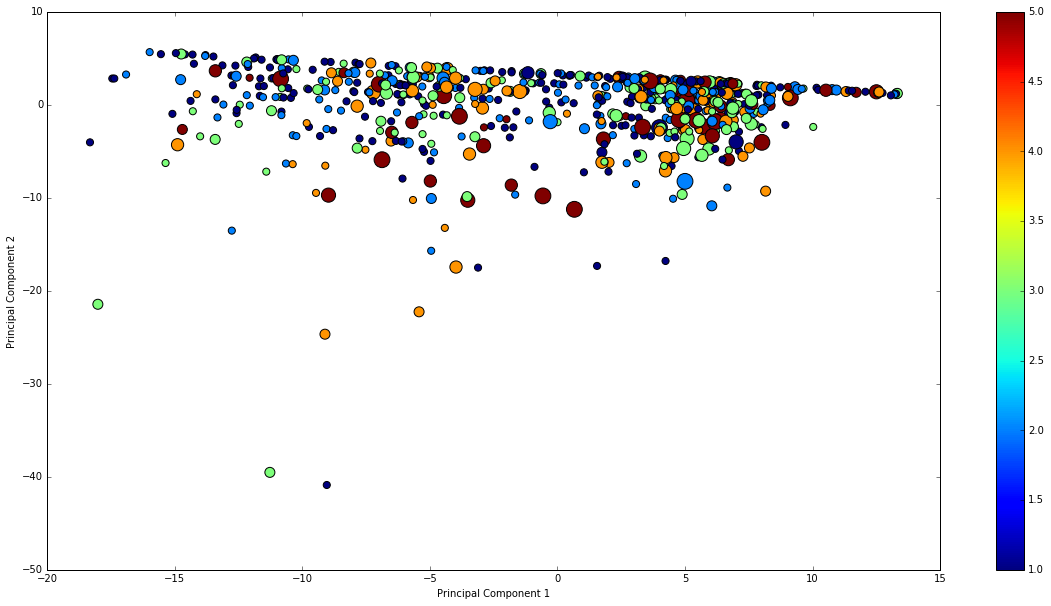

In [25]:
# PCA analysis 

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=walc, s=dalc*50, cmap='jet')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [26]:
PCA_cols = ['age', 'school_num', 'sex_num', 'address_num', 'famsize_num', 'reason_num', 'traveltime', 'Dalc', 'Walc',
            'studytime', 'failures', 'famsup_num', 'internet_num', 'romantic_num', 'freetime', 'health', 'paid_num']

combined_data_PCA = num_data_df[PCA_cols]

In [27]:
#building PCA models
pca_model_survey = PCA()
survey_PCA = pca_model_survey.fit_transform(combined_data_PCA)

In [28]:
pca_model_survey.explained_variance_ratio_

array([ 0.45024625,  0.13146285,  0.10163126,  0.0608246 ,  0.05591896,
        0.03744509,  0.03218337,  0.02742396,  0.02232332,  0.01438265,
        0.01387781,  0.01238772,  0.01110885,  0.00952429,  0.00851026,
        0.00754902,  0.00319976])

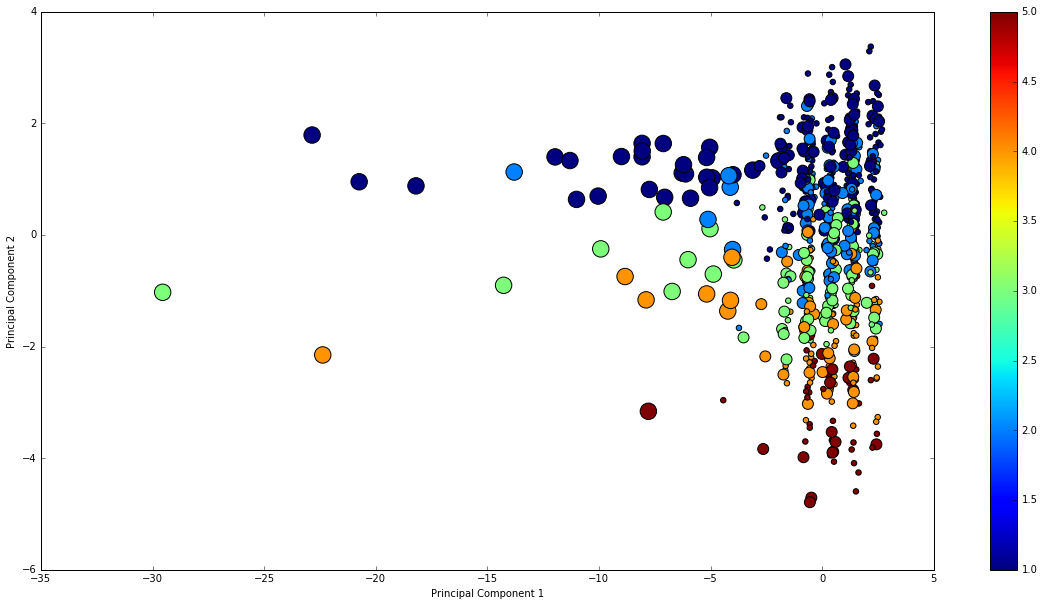

In [36]:
# PCA analysis 

plt.scatter(survey_PCA[:, 0], survey_PCA[:, 1], c=walc_all, s=((school_all+1)*(school_all+1))*30, cmap='jet')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()